# STRATEGY BASED ON RSI on ETH

In [1]:
import backtrader as bt
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import backtrader.feeds as btfeeds

In [2]:
data_feed_2 = btfeeds.GenericCSVData(
    dataname="/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/data/Bybit_ETH_for_backtesting_IV.csv",
    #fromdate=datetime(2024, 1, 1), 
    #todate=datetime(2024, 5, 24),
    nullvalue=0.0,
    dtformat=('%Y-%m-%d'),
    datetime=0,
    high=2,
    low=3,
    open=1,
    close=4,
    volume=5,
    openinterest=8
)

In [8]:
# Create a Stratey
class RSI_simple_Strategy(bt.SignalStrategy):
    params = (
        ('period', 14),
        ("rsi_upper", 70),
        ("rsi_mid", 50),
        ("rsi_lower", 30)
    )

    def __init__(self):
        

        # Add RSI indicator
        rsi = bt.indicators.RSI(period = self.p.period, upperband = self.p.rsi_upper, lowerband = self.p.rsi_lower)
        bt.talib.RSI(self.data, plotname='TA_RSI') 
        
        rsi_signal_long = bt.ind.CrossUp(rsi, self.p.rsi_lower, plot=False)
        self.signal_add(bt.SIGNAL_LONG, rsi_signal_long) 
        self.signal_add(bt.SIGNAL_LONGEXIT, -(rsi > self.p.rsi_mid))
        
        rsi_signal_short = -bt.ind.CrossDown(rsi, self.p.rsi_upper, plot=False) 
        self.signal_add(bt.SIGNAL_SHORT, rsi_signal_short) 
        self.signal_add(bt.SIGNAL_SHORTEXIT, rsi < self.p.rsi_mid)
        # Indicators for the plotting show
        

In [9]:
cerebro = bt.Cerebro(stdstats = False, cheat_on_open = True) #(stdstats = False)this disables the 3 observers for the trades
# Add a strategy
cerebro.addstrategy(RSI_simple_Strategy, period = 14)

##optimize!
#cerebro.optstrategy(
#        TestStrategy,
#        maperiod=range(10, 31))

cerebro.adddata(data_feed_2)

cerebro.broker.setcash(10000.0)
 # Add a FixedSize sizer according to the stake *I wanna buy 2 ETH cauze I feel rich and not a poor student sigh...
#cerebro.addsizer(bt.sizers.FixedSize, stake=2)
# Set the commission - 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0.001)
cerebro.addobserver(bt.observers.BuySell) 
cerebro.addobserver(bt.observers.Value)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}') 
cerebro.run() 
print(f'Final Portfolio Value: {cerebro.broker.getvalue():.2f}')
print("End :)")

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10727.42
End :)


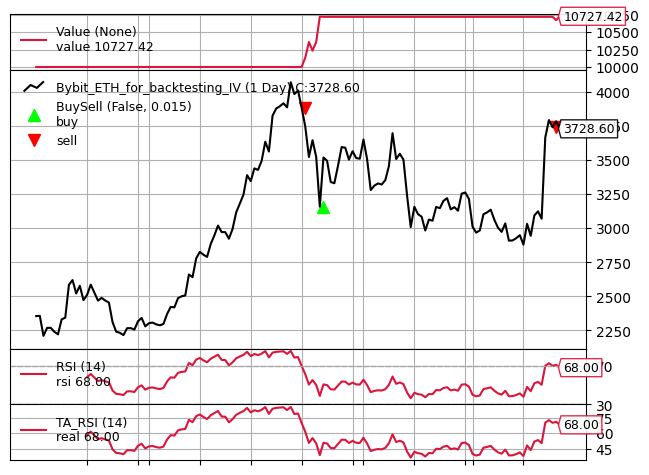

In [11]:
# Plotting
%matplotlib inline
fig = cerebro.plot(iplot=False)[0][0]

# Customize the x-axis date format
locator = AutoDateLocator()
formatter = DateFormatter('%Y-%m-%d')
ax = fig.get_axes()[0]  # Get the first (and only) axis
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
fig.autofmt_xdate()

plot_path = "/Users/leonardoplacidi/Desktop/BacktestingTrade/Python4Finance/some_plots/eth_RSI.png"  # Replace with your desired folder path
fig.savefig(plot_path, bbox_inches='tight')

plt.show()